# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
units = "metric"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_json['coord']['lat']
        city_lng = city_json['coord']['lon']
        city_max_temp = city_json['main']['temp_max']
        city_humidity = city_json['main']['humidity']
        city_clouds = city_json['clouds']['all']
        city_wind = city_json['wind']['speed']
        city_country = city_json['sys']['country']
        city_date = city_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | indramayu
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | portland
Processing Record 6 of Set 1 | merauke
Processing Record 7 of Set 1 | kodiak
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hofn
Processing Record 10 of Set 1 | chokurdakh
Processing Record 11 of Set 1 | esperance
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | vostok
Processing Record 14 of Set 1 | dyatkovo
Processing Record 15 of Set 1 | korla
Processing Record 16 of Set 1 | mahebourg
Processing Record 17 of Set 1 | chuy
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | la orilla
Processing Record 20 of Set 1 | khatanga
Processing Record 21 of Set 1 | nikolskoye
Processing Record 22 of Set 1 | bredasdorp
Processing Record 23 of Set 1 | saskylakh
Process

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,indramayu,-6.3264,108.3200,27.78,73,90,0.82,ID,1674359369
1,east london,-33.0153,27.9116,23.52,94,40,1.03,ZA,1674358784
2,jamestown,42.0970,-79.2353,-0.23,65,100,3.60,US,1674358961
3,georgetown,5.4112,100.3354,29.96,78,20,2.57,MY,1674358956
4,portland,45.5234,-122.6762,6.56,88,75,4.12,US,1674358888


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,indramayu,-6.3264,108.3200,27.78,73,90,0.82,ID,1674359369
1,east london,-33.0153,27.9116,23.52,94,40,1.03,ZA,1674358784
2,jamestown,42.0970,-79.2353,-0.23,65,100,3.60,US,1674358961
3,georgetown,5.4112,100.3354,29.96,78,20,2.57,MY,1674358956
4,portland,45.5234,-122.6762,6.56,88,75,4.12,US,1674358888


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

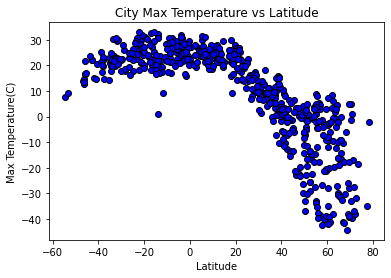

In [22]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

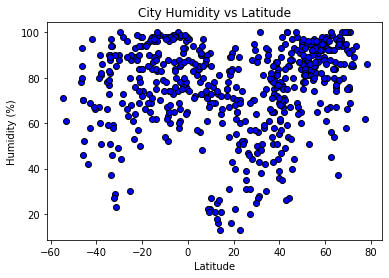

In [62]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

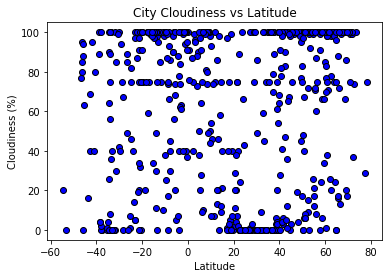

In [61]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

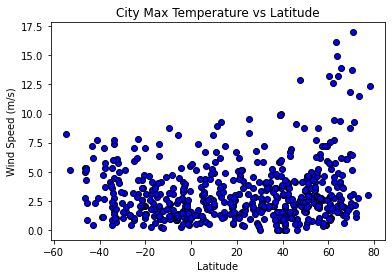

In [60]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [68]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,jamestown,42.0970,-79.2353,-0.23,65,100,3.60,US,1674358961
3,georgetown,5.4112,100.3354,29.96,78,20,2.57,MY,1674358956
4,portland,45.5234,-122.6762,6.56,88,75,4.12,US,1674358888
6,kodiak,57.7900,-152.4072,-1.27,69,0,2.57,US,1674358975
8,hofn,64.2539,-15.2082,4.53,87,100,13.24,IS,1674359006
...,...,...,...,...,...,...,...,...,...
556,bonthe,7.5264,-12.5050,24.15,86,99,2.56,SL,1674359453
557,saint-augustin,51.2260,-58.6502,-11.41,81,100,2.90,CA,1674358978
558,parabel,58.6978,81.4825,-21.45,95,100,7.19,RU,1674359453


In [67]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,indramayu,-6.3264,108.3200,27.78,73,90,0.82,ID,1674359369
1,east london,-33.0153,27.9116,23.52,94,40,1.03,ZA,1674358784
5,merauke,-8.4667,140.3333,28.94,74,66,4.70,ID,1674358986
7,lebu,-37.6167,-73.6500,14.78,86,0,5.30,CL,1674359031
10,esperance,-33.8667,121.9000,24.06,51,8,7.41,AU,1674358780
...,...,...,...,...,...,...,...,...,...
548,ilo,-17.6394,-71.3375,21.33,85,59,1.80,PE,1674359452
551,masvingo,-20.0637,30.8277,18.97,72,91,1.30,ZW,1674359452
554,kigali,-1.9500,30.0588,16.71,93,40,2.06,RW,1674359453


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8264276935546678


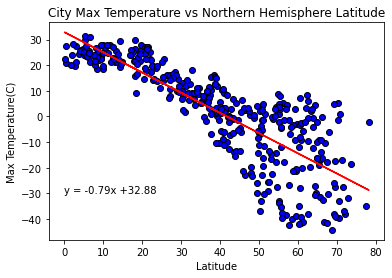

In [40]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], marker="o", facecolors="blue", edgecolors="black")
plt.plot(northern_hemi_df['Lat'],regress_values, 'r-')
plt.title("City Max Temperature vs Northern Hemisphere Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(0,-30))
print(f'The r-value is: {rvalue}')

The r-value is: 0.3819003140891021


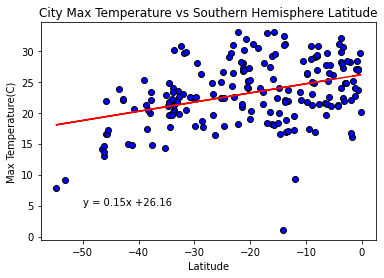

In [41]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], marker="o", facecolors="blue", edgecolors="black")
plt.plot(southern_hemi_df['Lat'],regress_values, 'r-')
plt.title("City Max Temperature vs Southern Hemisphere Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-50,5))
print(f'The r-value is: {rvalue}')

**Discussion about the linear relationship:** 
The Northern Hemisphere has a very strong positive correlation between latitude and maximum temperature.

The Southern Hemisphere has a weak positive correlation between latitude and maximum temperature.

The sample size of Southern Hemisphere cities is half that of the Northern Hemisphere which could explain the difference in the strength of the correlations.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3737512977228056


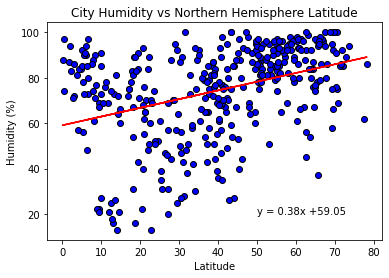

In [63]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], marker="o", facecolors="blue", edgecolors="black")
plt.plot(northern_hemi_df['Lat'],regress_values, 'r-')
plt.title("City Humidity vs Northern Hemisphere Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(50,20))
print(f'The r-value is: {rvalue}')

The r-value is: 0.25754339103507123


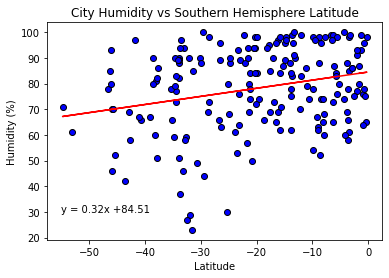

In [64]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], marker="o", facecolors="blue", edgecolors="black")
plt.plot(southern_hemi_df['Lat'],regress_values, 'r-')
plt.title("City Humidity vs Southern Hemisphere Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-55,30))
print(f'The r-value is: {rvalue}')

**Discussion about the linear relationship:** 
The Northern Hemisphere has a weak positive correlation between latitude and humidity.

The Southern Hemisphere has a weak positive correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.24607963359480886


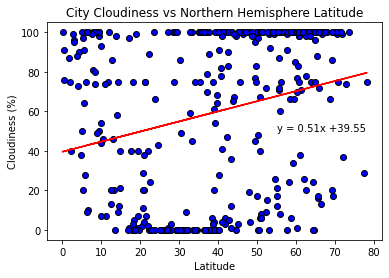

In [65]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], marker="o", facecolors="blue", edgecolors="black")
plt.plot(northern_hemi_df['Lat'],regress_values, 'r-')
plt.title("City Cloudiness vs Northern Hemisphere Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(55,50))
print(f'The r-value is: {rvalue}')

The r-value is: 0.28582960877927543


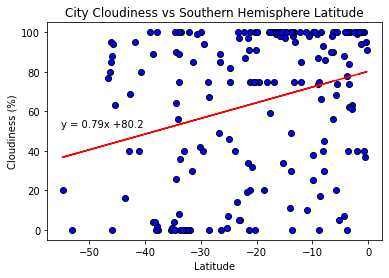

In [66]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], marker="o", facecolors="blue", edgecolors="black")
plt.plot(southern_hemi_df['Lat'],regress_values, 'r-')
plt.title("City Cloudiness vs Southern Hemisphere Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-55,52))
print(f'The r-value is: {rvalue}')

**Discussion about the linear relationship:** 
The Northern Hemisphere has a weak positive correlation between latitude and cloudiness.

The Southern Hemisphere has a weak positive correlation between latitude and cloudiness.

Both hemispheres are more likely to be completely cloudy or not cloudy than somewhere in between.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.19520942479059117


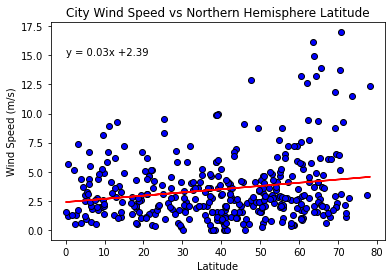

In [59]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], marker="o", facecolors="blue", edgecolors="black")
plt.plot(northern_hemi_df['Lat'],regress_values, 'r-')
plt.title("City Wind Speed vs Northern Hemisphere Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(0,15))
print(f'The r-value is: {rvalue}')

The r-value is: -0.33367976844257796


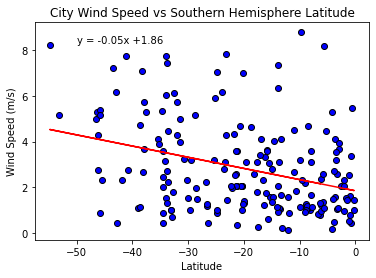

In [58]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], marker="o", facecolors="blue", edgecolors="black")
plt.plot(southern_hemi_df['Lat'],regress_values, 'r-')
plt.title("City Wind Speed vs Southern Hemisphere Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-50,8.3))
print(f'The r-value is: {rvalue}')

**Discussion about the linear relationship:** 
The Northern Hemisphere has a weak positive correlation between latitude and wind speed.

The Southern Hemisphere has a weak negative correlation between latitude and wind speed.

Latitude probably doesn't have anything to do with wind speed in the Southern Hemisphere.